In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

np.random.seed(42)
x = np.sort(np.random.randint(50, 3000, 15))
y = 0.0001 * x**2 - 0.3 * x + np.random.normal(0, 10, 15)

# x = np.append(x, [1500]) # produce outlier
# y = np.append(y, [3000])

data = np.column_stack((x, y))
df = pd.DataFrame(data, columns=['x', 'y'])

df.head()

,x,y
0,180.0,-48.429048
1,380.0,-98.380054
2,516.0,-113.550619
3,819.0,-163.236750
4,910.0,-214.581058


In [49]:
np.random.seed(42)
araba_fiyat = np.sort(np.random.randint(50, 3000, 15))
araba_max_hiz = 0.0001 * araba_fiyat**2 - 0.3 * araba_fiyat + 250 + np.random.normal(0, 10, 15)


In [50]:

def activate_polynomial(degree):
    X = df[['x']]
    y = df['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    polynomial_features = PolynomialFeatures(degree=degree) # selected degree
    X_train_poly = polynomial_features.fit_transform(X_train)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = polynomial_features.transform(X_range)
    y_range_pred = model.predict(X_range_poly)
    mse = mean_squared_error(y_test, model.predict(polynomial_features.transform(X_test)))
    r2 = r2_score(y_test, model.predict(polynomial_features.transform(X_test)))
    print(f'Degree: {degree}, MSE: {mse}, R²: {r2}')
    
    plt.figure()
    plt.scatter(X, y, color='green', label='Actual')
    plt.plot(X_range, y_range_pred, label=f'Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.legend()
    plt.show()

Degree: 1, MSE: 9301.336600885103, R²: -0.5444231741513919


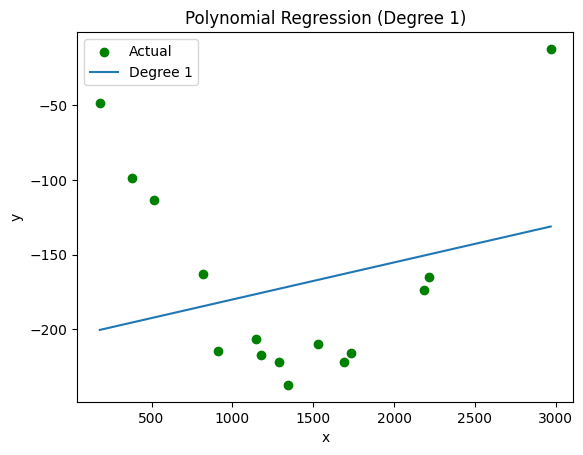

Degree: 2, MSE: 109.3882477517188, R²: 0.9818368314085643


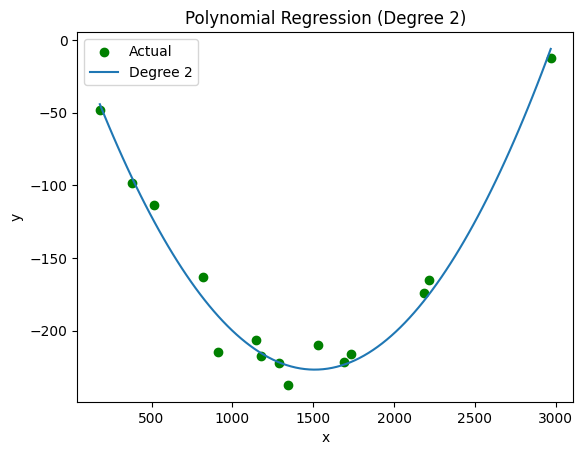

Degree: 3, MSE: 193.30148246970637, R²: 0.9679036140789029


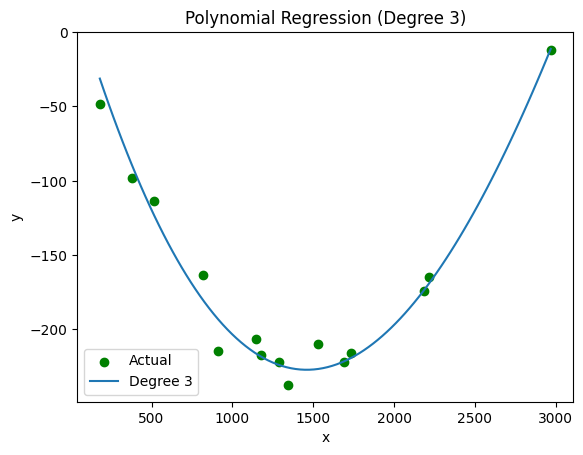

Degree: 4, MSE: 158.77053306269661, R²: 0.9736372414894581


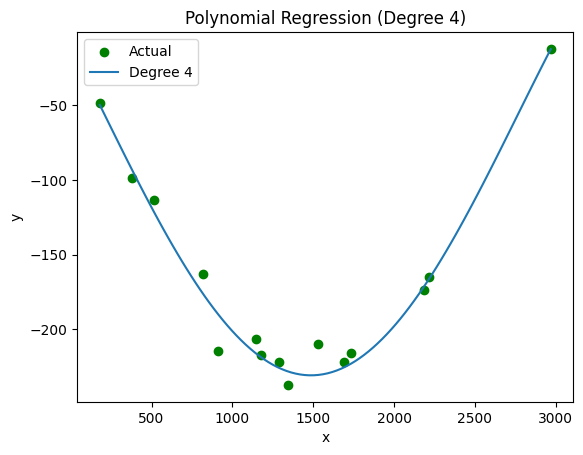

Degree: 5, MSE: 193.49079750983807, R²: 0.9678721796144016


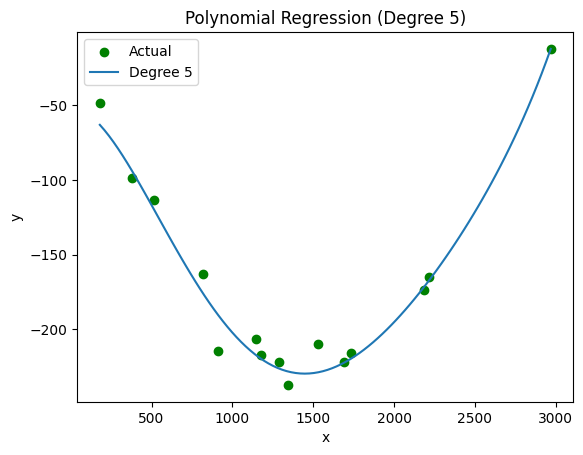

Degree: 6, MSE: 565.3441505129218, R²: 0.9061284797133347


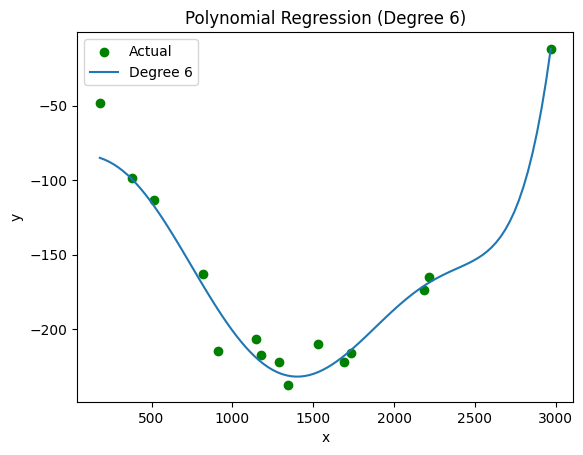

Degree: 7, MSE: 1184.8817141367533, R²: 0.8032585147206811


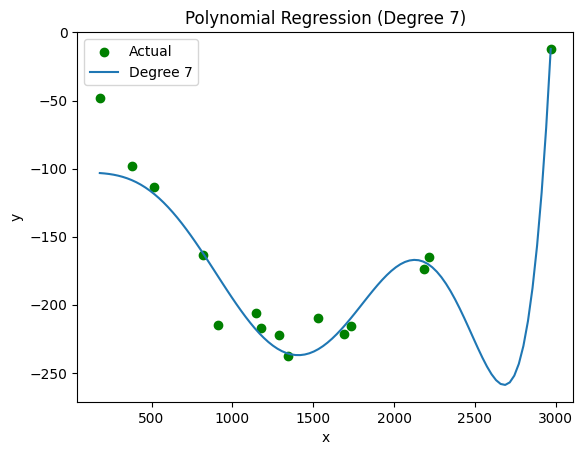

Degree: 8, MSE: 1884.0550934445698, R²: 0.6871655685036848


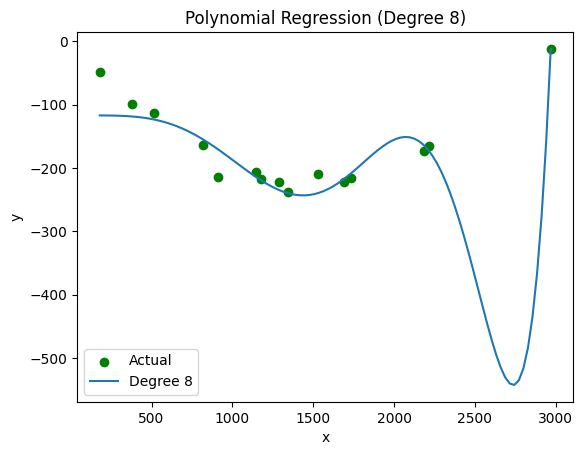

Degree: 9, MSE: 2614.1850783734653, R²: 0.5659324901566773


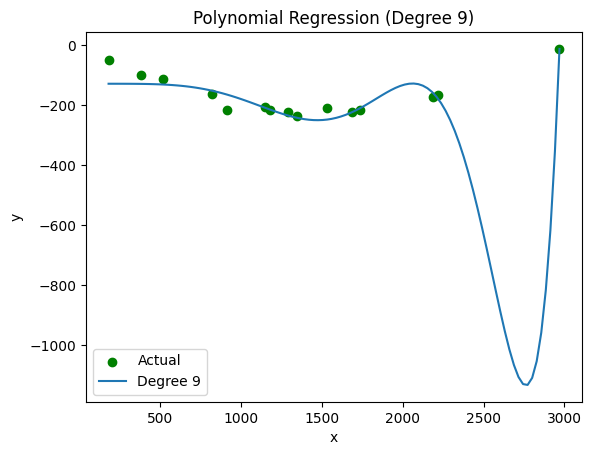

In [51]:

for degree in range(1, 10):
    activate_polynomial(degree)